
<center>МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИЙСКОЙ ФЕДЕРАЦИИ </center>
<center>ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ </center>
<center>«НОВОСИБИРСКИЙ ГОСУДАРСТВЕННЫЙ ТЕХНИЧЕСКИЙ УНИВЕРСИТЕТ»</center>
<center>Кафедра Вычислительной техники </center>
<br>
<center> <b> <font size="5">  ОТЧЁТ </font>  </b>  </center>   
<center><font size="3">по лабораторной работе №1</font></center>
<center><font size="3">по дисциплине: «Системы искусственного интеллекта и машинное обучение» </font></center>
<br>

Выполнили:
- Маркелов Н. Э.
- Калашников М. А.

Проверил: Осипенко И. В.

Новосибирск, 2024

## Цель работы

Получить практические навыки работы по решению задачи первичного анализа «сырых» данных, подготовки массива к обработке, выявлению и описанию зависимостей в исходных данных с использованием языка программирования Python.

## Ход Работы

In [181]:
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model, metrics

Загрузим данные из csv файла. Осмотрев файл определили, что разделительным знаком для данных является ";", десятичные дроби пишутся через ",", а поврежденные данные записываются как ">>?<<".

In [182]:
df = pd.read_csv(
    "./datasets/data.csv", 
    sep='\t', 
    decimal=',', 
    header=0,
    na_values='isntKnown'
)
df[0:]

,ID,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,2.0,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,3.0,0.23,Good,E,VS1,56.9,65.0,NaN,4.05,4.07,2.31
3,4.0,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,5.0,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936.0,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,53937.0,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,53938.0,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,53939.0,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


Кол-во записей и признаков:

In [183]:
print  (df.shape)
nrow = df.shape[0]
ncol = df.shape[1]
print ("Итого: " + str(nrow) + " записи, " + str(ncol) + " столбец (признак).")

(53940, 11)
Итого: 53940 записи, 11 столбец (признак).


Смысловое описание признаков:
* Index counter
* caratCarat weight of the diamond
* cutDescribe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal
* colorColor of the diamond, with D being the best and J the worst
* clarityHow obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) * FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
* depthdepth % :The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
* tabletable%: The width of the diamond's table expressed as a percentage of its average diameter
* pricethe price of the diamond
* xlength mm
* ywidth mm
* zdepth mm


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       53918 non-null  float64
 1   carat    53918 non-null  float64
 2   cut      53917 non-null  object 
 3   color    53919 non-null  object 
 4   clarity  53918 non-null  object 
 5   depth    53918 non-null  float64
 6   table    53909 non-null  float64
 7   price    53916 non-null  float64
 8   x        53924 non-null  float64
 9   y        53914 non-null  float64
 10  z        53918 non-null  float64
dtypes: float64(8), object(3)
memory usage: 4.5+ MB


Заменим поврежденные данные на NaN.

In [185]:

print(df['cut'].unique())
print(df['color'].unique())
print(df['clarity'].unique())
df['cut_digit'] = df['cut'].map(
  {
    'Ideal'  : 5,
    'Premium' : 4,
    'Very Good' : 3,
    'Good' : 2,
    'Fair' : 1
  }
)
df['color_digit'] = df['color'].map(
  {
    'D' : 70,
    'E' : 60,
    'F' : 50,
    'G' : 40,
    'H' : 30,
    'I' : 20,
    'J' : 10
  }
)
df['clarity_digit'] = df['clarity'].map(
  {
    'I1' : 1,
    'SI2' : 2,
    'SI1' : 3,
    'VS2' : 4,
    'VS1' : 5,
    'VVS2' : 6,
    'VVS1' : 7,
    'IF' : 8,
  }
)
df[['color_digit', 'color', 'clarity_digit', 'clarity', 'cut_digit', 'cut']]



['Ideal' 'Premium' 'Good' 'Very Good' 'Fair' nan]
['E' 'I' 'J' 'H' 'F' 'G' 'D' nan]
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF' nan]


,color_digit,color,clarity_digit,clarity,cut_digit,cut
0,60.0,E,2.0,SI2,5.0,Ideal
1,60.0,E,3.0,SI1,4.0,Premium
2,60.0,E,5.0,VS1,2.0,Good
3,20.0,I,4.0,VS2,4.0,Premium
4,10.0,J,2.0,SI2,2.0,Good
...,...,...,...,...,...,...
53935,70.0,D,3.0,SI1,5.0,Ideal
53936,70.0,D,3.0,SI1,2.0,Good
53937,70.0,D,3.0,SI1,3.0,Very Good
53938,30.0,H,2.0,SI2,4.0,Premium


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             53918 non-null  float64
 1   carat          53918 non-null  float64
 2   cut            53917 non-null  object 
 3   color          53919 non-null  object 
 4   clarity        53918 non-null  object 
 5   depth          53918 non-null  float64
 6   table          53909 non-null  float64
 7   price          53916 non-null  float64
 8   x              53924 non-null  float64
 9   y              53914 non-null  float64
 10  z              53918 non-null  float64
 11  cut_digit      53917 non-null  float64
 12  color_digit    53919 non-null  float64
 13  clarity_digit  53918 non-null  float64
dtypes: float64(11), object(3)
memory usage: 5.8+ MB


Исключаем столбцы id, lat и long по причине их слабой корреляции 

In [187]:
df = df.drop (
    labels = ['cut','color', 'clarity' ], # список названий столбцов
    axis=1
    )
df[:3]

,ID,carat,depth,table,price,x,y,z,cut_digit,color_digit,clarity_digit
0,1.0,0.23,61.5,55.0,326.0,3.95,3.98,2.43,5.0,60.0,2.0
1,2.0,0.21,59.8,61.0,326.0,3.89,3.84,2.31,4.0,60.0,3.0
2,3.0,0.23,56.9,65.0,NaN,4.05,4.07,2.31,2.0,60.0,5.0


Кол-во пустых значнний:

In [188]:
print(df[:4])
df.isna().sum()


    ID  carat  depth  table  price     x     y     z  cut_digit  color_digit  \
0  1.0   0.23   61.5   55.0  326.0  3.95  3.98  2.43        5.0         60.0   
1  2.0   0.21   59.8   61.0  326.0  3.89  3.84  2.31        4.0         60.0   
2  3.0   0.23   56.9   65.0    NaN  4.05  4.07  2.31        2.0         60.0   
3  4.0   0.29   62.4   58.0  334.0  4.20  4.23  2.63        4.0         20.0   

   clarity_digit  
0            2.0  
1            3.0  
2            5.0  
3            4.0  


ID               22
carat            22
depth            22
table            31
price            24
x                16
y                26
z                22
cut_digit        23
color_digit      21
clarity_digit    22
dtype: int64

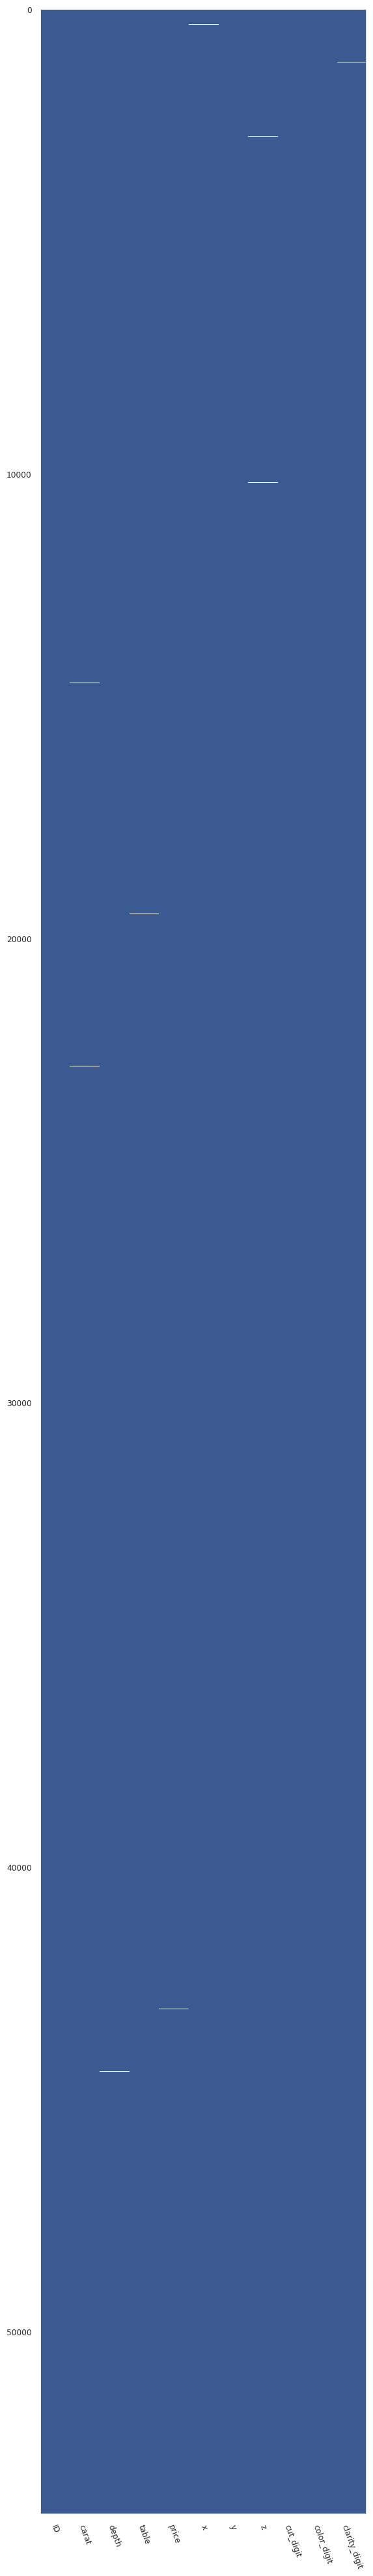

In [189]:
def showEmptyMap(data, ):
    fig, ax = plt.subplots( figsize=(len(data.columns) / 1.7, 50 ))
    plt.imshow( 
            df.isna(),
            cmap = ListedColormap([ '#3B5A92', 'white', ]),
            aspect='auto',
            interpolation= 'none'
        )
    ax.set_xticks(np.arange(len(data.columns)))
    ax.set_xticklabels(data.columns, rotation=-70,)
    plt.grid(False)
showEmptyMap(df)

Рис.1 Пропущенные значения в данных

Вырежем все строки, где есть хоть одно пустое значение. 

ID               0
carat            0
depth            0
table            0
price            0
x                0
y                0
z                0
cut_digit        0
color_digit      0
clarity_digit    0
dtype: int64


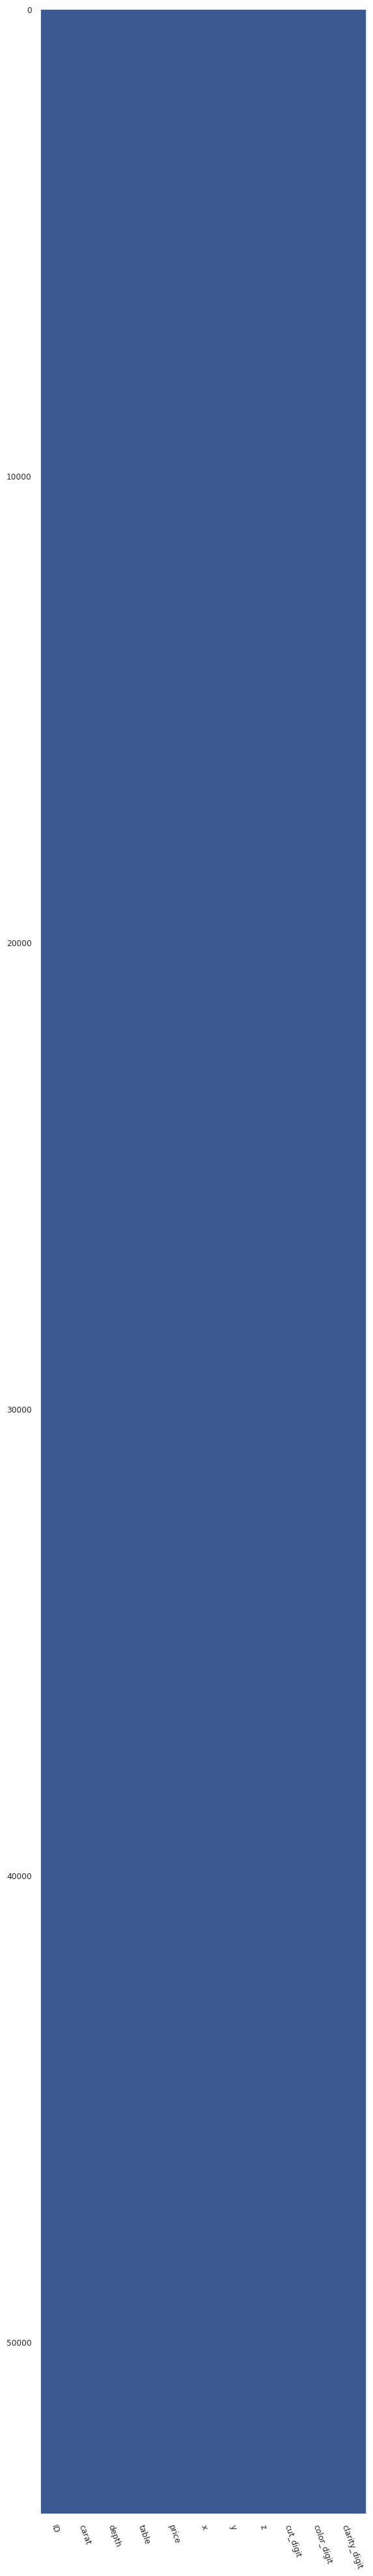

In [190]:
df = df.dropna(axis='index', how='any')
print (df.isna().sum())
showEmptyMap(df)

Вырежем столбец даты и построим матрицу корреляции Пирсона для возможных комбинай пар.

In [191]:
#ненужный объект
df = df.drop (
    labels = ['ID' ], # список названий столбцов
    axis=1
    )


In [192]:
corr_df = df.corr(method='pearson')

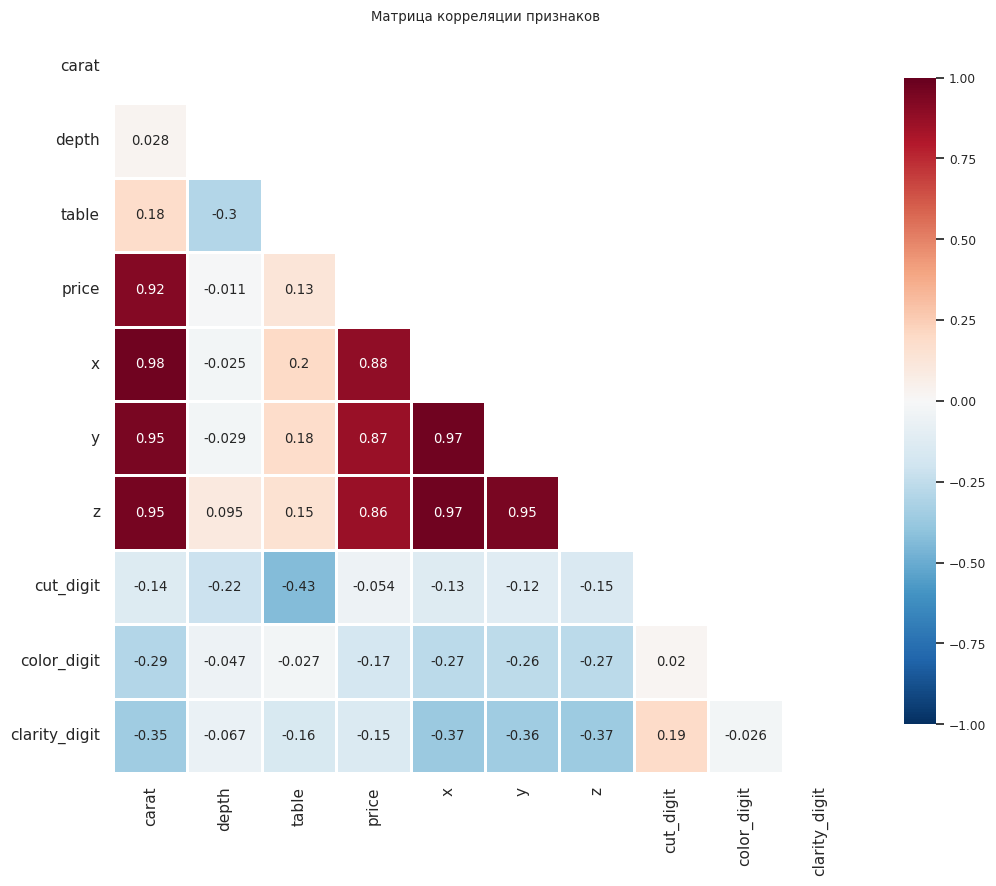

In [193]:
sns.set(style="white")
mask = np.zeros_like(corr_df, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=0.8) # размер шрифта

# Построить тепловую карту
sns.heatmap(
            ##################
            data=corr_df,   ### <<<- объект-матрица корреляции
            ##################
            vmin=-1, vmax=1, center=0,
            annot=True,
            cmap = 'RdBu_r',
            mask=mask,   # применить маску
            square=True, # форма ячейки - квадрат
            linewidths=1.0, # зазор между ячейки
            cbar_kws={"shrink": .7}  # уменьшить размер легенды
           )
plt.title(u'Матрица корреляции признаков');

Рис.2 Тепловая карта по значениям взаимозависимости признаков выборки.

Получим столбец для целевого признака price.

In [194]:
corr_df[["price"]].abs().sort_values('price')

,price
depth,0.010741
cut_digit,0.053679
table,0.127648
clarity_digit,0.146696
color_digit,0.172423
z,0.861077
y,0.865280
x,0.884391
carat,0.921506
price,1.000000


В качестве целевой переменной выберем признак:
- **'Price'** - Стоимость.


В качестве независимых переменных выберем признаки с высоким абс. значением коэфф. корреляции, но при этом как можно более не связанные  между собой. Кандидаты:
  * **'sqft_living'** - Жилая площадь в квадратных футах
  * **'grade'**-  Оценка квартиры
  * **'sqft_above'** - Жилая площадь над уровнем земли в квадратных футах
  * **'sqft_living15'** - Размер жилой площади 15 ближайших объектов недвижимости в квадратных футах
  * **'bathrooms'** - Количество ванных комнат
  
  

<Figure size 700x700 with 0 Axes>

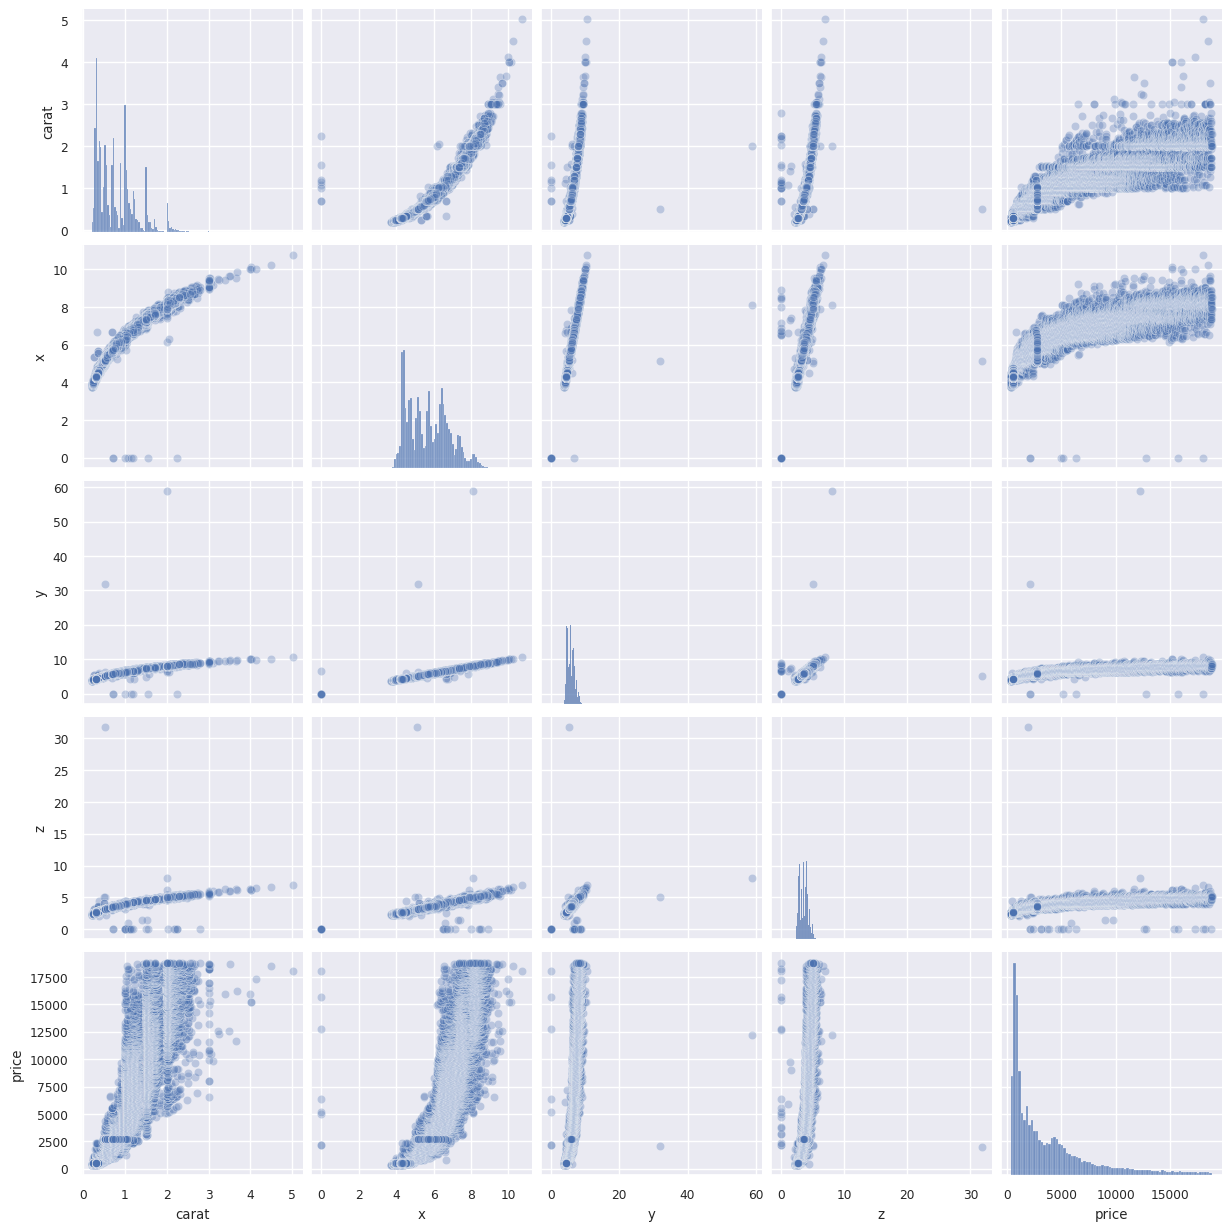

In [195]:
features = ['carat', 'x', 'y', 'z']
target = ['price']
plt.figure(figsize=(7,7))
%config InlineBackend.figure_format = 'png'
sns.pairplot(
    df[features + target],
    #hue = 'Type',         # Признак разделения
    kind="scatter",        # Тип даграмм: reg,scatter
    diag_kind = 'hist',     # Тип диагоральных даграмм: hist, kde
    plot_kws={'alpha':0.3} # прозрачность точек
)

Рис. 3. Графики рассеяния данных у выбранных признаков.

Отфильтруем аномальные значения в данных, с помощью нормального распределения Гаусса.

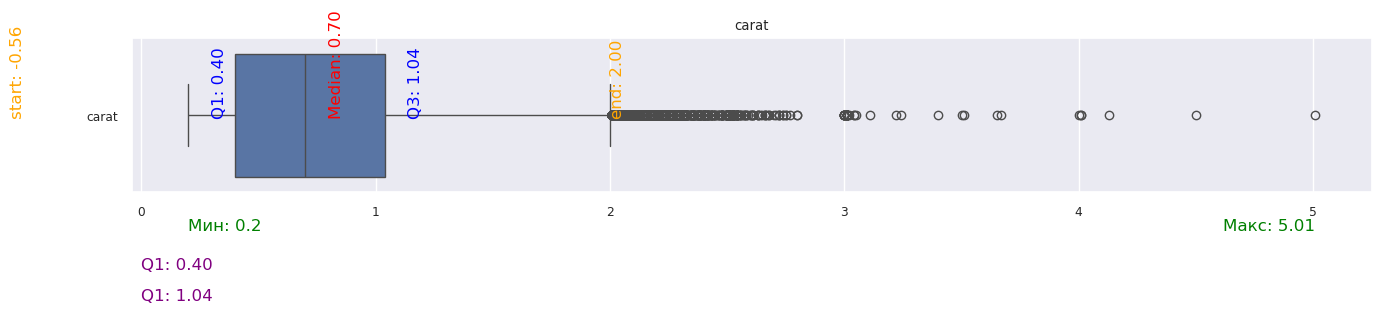

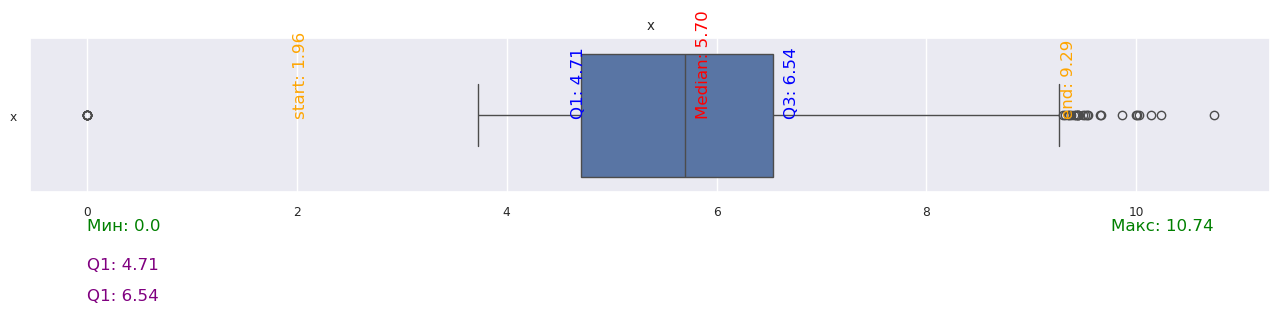

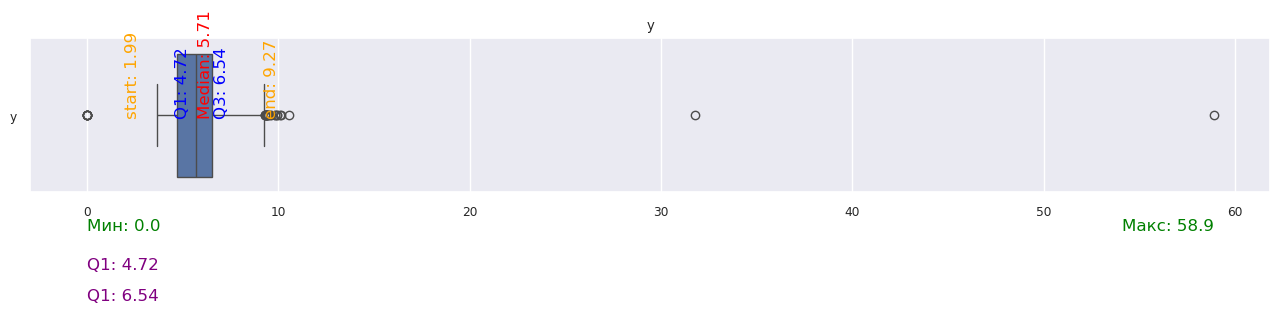

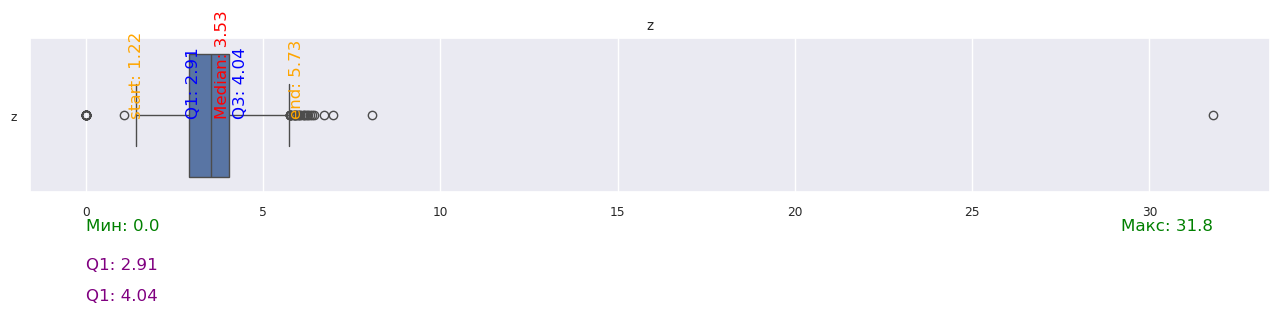

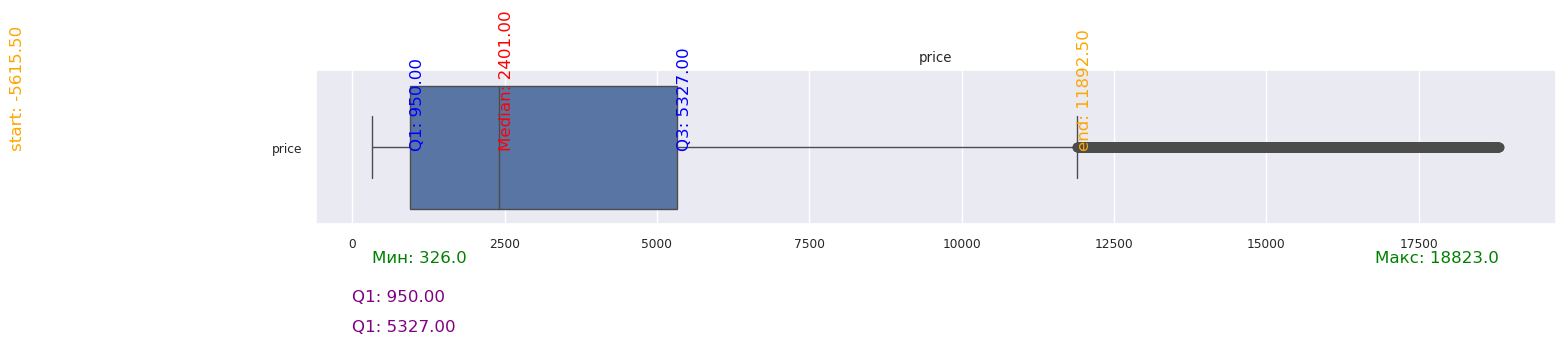

In [196]:
for feature_name in (features+target):

    # Построить полотно для рисования с указанным размером
    plt.figure(figsize=(16,2))

    # На созданном полотне отрисовать boxplot
    sns.boxplot( 
      data=df[[feature_name]], # данные
      orient='h' # ориентация графика
               )
    median = df[feature_name].median()
    #quantiles = df[feature_name].quantile([0.25, 0.75])
    min_val = df[feature_name].min()
    max_val = df[feature_name].max()

    Q1 = df[feature_name].quantile(0.25)
    Q3 = df[feature_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    plt.text(median + 0.1, 0, f'Median: {median:.2f}', color='red', fontsize=12,rotation=90)
    plt.text(Q1 - 0.1, 0, f'Q1: {Q1:.2f}', color='blue', fontsize=12, rotation=90)
    plt.text(Q3 + 0.1, 0, f'Q3: {Q3:.2f}', color='blue', fontsize=12, rotation=90)
    plt.text(0 , 1, f'Q1: {Q1:.2f}', color='purple', fontsize=12, rotation=0)
    plt.text(0, 1.2, f'Q1: {Q3:.2f}', color='purple', fontsize=12, rotation=0)
    plt.text(min_val, 0.75, f'Мин: {min_val}', color='green', fontsize=12, horizontalalignment='left')
    plt.text(max_val, 0.75, f'Макс: {max_val}', color='green', fontsize=12, horizontalalignment='right')
    plt.text(lower_bound, 0, f'start: {lower_bound:.2f}', color='orange', fontsize=12, rotation=90)
    plt.text(upper_bound, 0, f'end: {upper_bound:.2f}', color='orange', fontsize=12, rotation=90)



    plt.title(feature_name)
    plt.show()


Рис. 4. Визульное представление данных на числовой прямой - аномальные данные находятся за вертикальными границами.

Вырежем аномальные данные:

In [197]:
tressholdDict = {
    'z' : (0,8),
    'y' : (4,9),
    'x' : (4,10),
    'carat' : (0,3),
    'price' : (326, 18823),
}

print (tressholdDict)

{'z': (0, 8), 'y': (4, 9), 'x': (4, 10), 'carat': (0, 3), 'price': (326, 18823)}


Посмотрим сколько данных не входящих в нормальное распределение осталось после удаления:

In [198]:
for feature_name  in tressholdDict:
    threesMin =  tressholdDict[feature_name][0] # извлечь нижнее пороговое
    tresshMax =  tressholdDict[feature_name][1] # извлечь верхнее пороговое

    # Получить кол-во эл. вне пороговых значений. Прием - фильтрация
    over_count = len(  df[
                            ~((df[feature_name] >= threesMin ) & (df[feature_name] <= tresshMax)) # фильтр по двум границам. ~ инверсия логических значений
                          ]
                    )

    dcount = df[feature_name].count() # кол-во эл. общее

    print ('''{}. Принимаем пороговые значение равными {}.
  Кол-во эл. вне пороговых - {} из {} значение(ий) ({:.1%})\n'''.format(
        feature_name,
        tressholdDict[feature_name],
        over_count,
        dcount,
        over_count/ dcount,
    ))

z. Принимаем пороговые значение равными (0, 8).
  Кол-во эл. вне пороговых - 2 из 53689 значение(ий) (0.0%)

y. Принимаем пороговые значение равными (4, 9).
  Кол-во эл. вне пороговых - 359 из 53689 значение(ий) (0.7%)

x. Принимаем пороговые значение равными (4, 10).
  Кол-во эл. вне пороговых - 456 из 53689 значение(ий) (0.8%)

carat. Принимаем пороговые значение равными (0, 3).
  Кол-во эл. вне пороговых - 32 из 53689 значение(ий) (0.1%)

price. Принимаем пороговые значение равными (326, 18823).
  Кол-во эл. вне пороговых - 0 из 53689 значение(ий) (0.0%)



In [199]:
df_digPlusFiltred = df.copy()

for feature_name  in tressholdDict:
    threesMin =  tressholdDict[feature_name][0]
    tresshMax =  tressholdDict[feature_name][1]


    # фильтр по двум границам. Оператор "~" -инверсия логических значений
    df_digPlusFiltred = df_digPlusFiltred[
        (df_digPlusFiltred[feature_name] >= threesMin ) & (df_digPlusFiltred[feature_name] <= tresshMax)
        ]
    print("Обработан ", feature_name )


print ("Отброшено {} строк. Осталось {} строк.".format(
    len(df)  - len(df_digPlusFiltred),
    len(df_digPlusFiltred))
)

Обработан  z
Обработан  y
Обработан  x
Обработан  carat
Обработан  price
Отброшено 511 строк. Осталось 53178 строк.


Проверим, что все ок:

In [200]:
for feature_name  in tressholdDict:
    threesMin =  tressholdDict[feature_name][0] # извлечь нижнее пороговое
    tresshMax =  tressholdDict[feature_name][1] # извлечь верхнее пороговое

    # Получить кол-во эл. вне пороговых значений. Прием - фильтрация
    over_count = len(  df_digPlusFiltred[
                            ~((df_digPlusFiltred[feature_name] >= threesMin ) & (df_digPlusFiltred[feature_name] <= tresshMax)) # фильтр по двум границам. ~ инверсия логических значений
                          ]
                    )

    dcount = df_digPlusFiltred[feature_name].count() # кол-во эл. общее

    print ('''{}. Принимаем пороговые значение равными {}.
  Кол-во эл. вне пороговых - {} из {} значение(ий) ({:.1%})\n'''.format(
        feature_name,
        tressholdDict[feature_name],
        over_count,
        dcount,
        over_count/ dcount,
    ))

z. Принимаем пороговые значение равными (0, 8).
  Кол-во эл. вне пороговых - 0 из 53178 значение(ий) (0.0%)

y. Принимаем пороговые значение равными (4, 9).
  Кол-во эл. вне пороговых - 0 из 53178 значение(ий) (0.0%)

x. Принимаем пороговые значение равными (4, 10).
  Кол-во эл. вне пороговых - 0 из 53178 значение(ий) (0.0%)

carat. Принимаем пороговые значение равными (0, 3).
  Кол-во эл. вне пороговых - 0 из 53178 значение(ий) (0.0%)

price. Принимаем пороговые значение равными (326, 18823).
  Кол-во эл. вне пороговых - 0 из 53178 значение(ий) (0.0%)



carat 0.23 3.0
x 4.0 9.08
y 4.0 8.98
z 0.0 6.16
price 334.0 18823.0


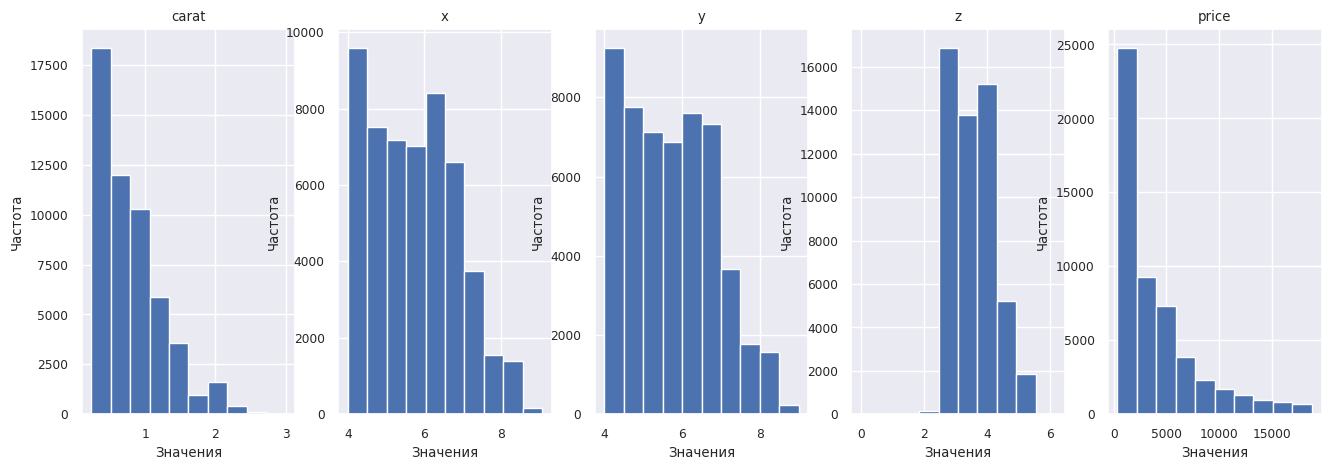

In [201]:
# Строим гистограммы по каждому признаку:
# data[features].hist() #Упрощенный вывод графиков

plt.figure(figsize=(16, 5))
plot_number = 0

for feature_name in (features+target):
    plot_number += 1

    plt.subplot(1, len(features+target), plot_number)

    plt.hist(df_digPlusFiltred[feature_name]) # Построение гистрограммы

    plt.title(feature_name)
    plt.xlabel(u'Значения')
    plt.ylabel(u'Частота')
    print (feature_name,
           df_digPlusFiltred[feature_name].min(),
           df_digPlusFiltred[feature_name].max())

Сохраним данные:

In [202]:
df_digPlusFiltred.to_csv('./datasets/melbourne_data_PREPARED.csv', # путь для сохранения
            index=False, # запрет сохранения "индексов" (тек. номеров строк)
           )

Сформируем таблицы для обучения и тренировки модели:

In [203]:
valid_size = 0.3 # доля тестовой части в выборке
rand_seed = 8 # начальное состояние генератора случ. чисел

x_train, x_test, y_train, y_test =  train_test_split(
    df_digPlusFiltred[features],    # исходные данные X
    df_digPlusFiltred[target],      # исходные данные y

    test_size = valid_size, # доля тестовой части в выборке
    random_state=rand_seed, # начальное состояние генератора случ. чисел
    shuffle=True            # перемешивание
)

In [204]:
print ("Кол-во элементов: \n  x_train: {}, y_train {} \n  x_test:  {}, y_test  {} \n  total x: {}, total y {} ".format  (
    len(x_train), len(y_train),
    len(x_test),  len(y_test),
    len(x_train)+len(x_test), len(y_train)+len(y_test),
))

Кол-во элементов: 
  x_train: 37224, y_train 37224 
  x_test:  15954, y_test  15954 
  total x: 53178, total y 53178 


In [205]:
x_test[:3]

,carat,x,y,z
51759,0.70,5.69,5.64,3.54
28991,0.34,4.47,4.51,2.79
5245,1.00,6.30,6.36,3.97


In [206]:
y_test[:3]

,price
51759,2407.0
28991,686.0
5245,3789.0


## Создадим одномерную модель, которая будет предсказывать цену по признаку жилой площади:

In [207]:
model_lin_empty = linear_model.LinearRegression()

Введем матрицу значений и результатов:

In [208]:
model_lin_fitted_carat = model_lin_empty.fit(
    x_train[['carat']],
    y_train[['price']]
)

In [209]:
y_pred_price_with_carat = model_lin_fitted_carat.predict(x_test[['carat']])

[[ 3161.43389197]
 [  339.27075252]
 [ 5513.23650818]
 ...
 [13666.15224437]
 [ 6532.3509752 ]
 [ 2299.10626603]]        carat
51759   0.70
28991   0.34
5245    1.00
13253   1.18
4260    1.00
...      ...
32921   0.42
33361   0.41
25433   2.04
17758   1.13
109     0.59

[15954 rows x 1 columns]


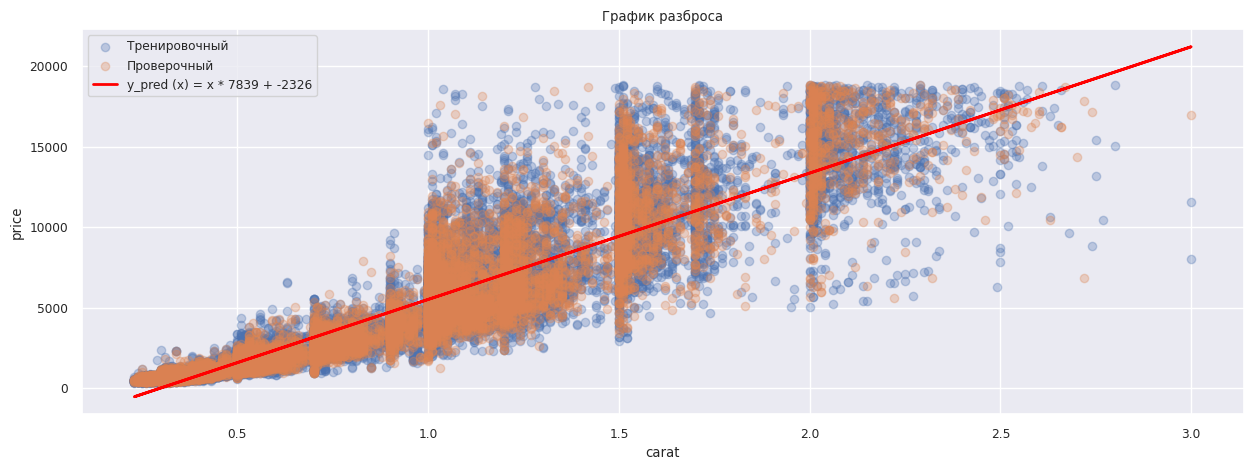

In [210]:
plt.figure(figsize=(15,5))

plt.scatter(x_train[['carat']],  y_train[['price']], alpha=0.3, label='Тренировочный')
plt.scatter(x_test[['carat']],   y_test[['price']],  alpha=0.3, label='Проверочный')

# Нанести график - линии через точки - plt.plot
label_str = "y_pred (x) = x * {:.0f} + {:.0f}".format(model_lin_fitted_carat.coef_[0][0], model_lin_fitted_carat.intercept_[0])

plt.plot( x_test[['carat']], y_pred_price_with_carat,
            lw=2, color='red', label=label_str)

plt.legend(loc="best")  # положение легенды
plt.xlabel('carat') # подпись осей
plt.ylabel(target[0])   # подпись осей
plt.title(u'График разброса'); # Заголовок
print(y_pred_price_with_carat, x_test[['carat']])

Рис. 5. График рассеяния зависимой величины price от определяющего признака sqft_living

Для оценки точности построим гистограмму распределения ошибок:


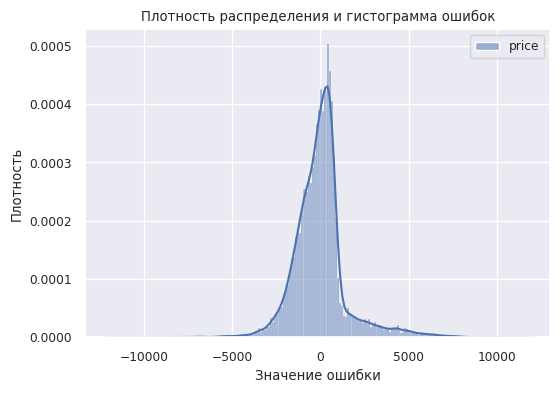

In [211]:
plt.figure(figsize=(6,4))

# Гистограмма и Плотность распределения - sns.distplot
# data = y_true - y_pred
sns.histplot( data = y_test[['price']] - y_pred_price_with_carat,
              color="red",
              kde=True, # оценка плотности в виде кривой
              stat="density",# density: общая площадь равна 1
            )

# Осевая линия
plt.plot(
    [0, 0],
    [0, 23 * pow(10,-7)], '--', lw=2, c='r')

plt.ylabel(u'Плотность')
plt.xlabel(u'Значение ошибки')
plt.title(u'Плотность распределения и гистограмма ошибок');
plt.show()

Рис. 6. Гистограммa распределения ошибок

Text(0, 0.5, 'Абсолютная ошибка')

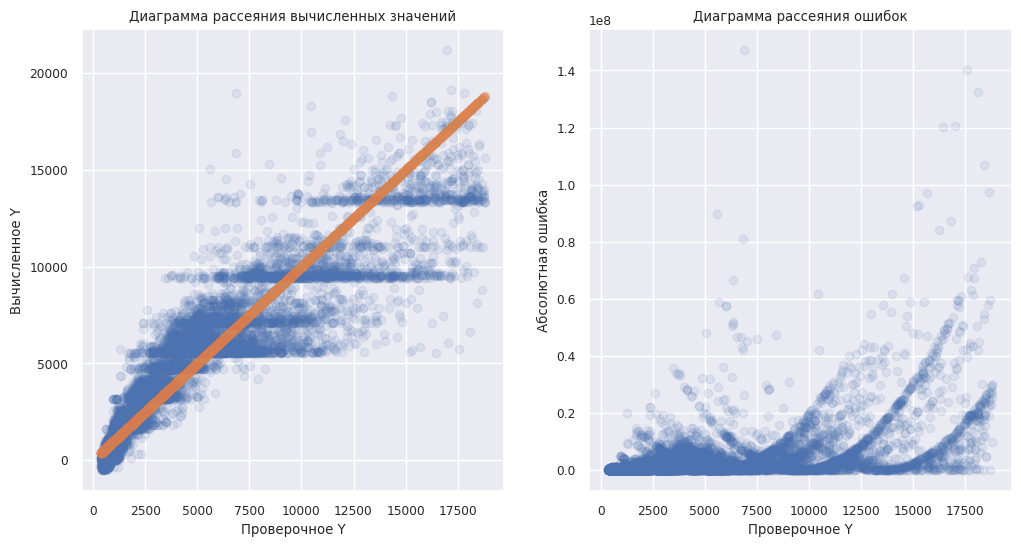

In [212]:
plt.figure(figsize=(12,6))

# создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс в сетке
plt.subplot(121)
plt.scatter(y_test[['price']], y_pred_price_with_carat,  alpha=0.1)
plt.scatter(y_test[['price']], y_test[['price']],  alpha=0.1)
plt.title('Диаграмма рассеяния вычисленных значений')
plt.xlabel('Проверочное Y')
plt.ylabel('Вычисленное Y')

# создать первое полотно 121: 1-строк, 2-столбцов, 2-индекс в сетке
plt.subplot(122)
plt.scatter(y_test[['price']], (y_test[['price']] - y_pred_price_with_carat)**2,  alpha=0.1)

plt.title('Диаграмма рассеяния ошибок')
plt.xlabel('Проверочное Y')
plt.ylabel('Абсолютная ошибка')

Рис.7. График рассеяния вычисленных значений Y_pred от проверочных значений Y_test;
Рис.8. График квадратов ошибок от проверочных значний Y_test.

С помощью функций __sklearn.metrics.*__ сравним реальные и вычисленные значениямя и получим важные оценки качества модели

In [213]:
print ("Линейная одномерная регрессия. Признак 'carat'.")
print ("y_pred_price_with_carat (x) = x * {} + {}\n".format(
              model_lin_fitted_carat.coef_,
              model_lin_fitted_carat.intercept_))

'''
Вычисление и вывод метрик: MAE, RMSE, R2.
На основе сравнения проверочных и вычисленных.
'''
mae  = metrics.mean_absolute_error(y_test, y_pred_price_with_carat)
mse  = metrics.mean_squared_error (y_test, y_pred_price_with_carat)
rmse = np.sqrt(mse)
r2   = metrics.r2_score           (y_test, y_pred_price_with_carat)

print ("MAE : {:>9,.3f} (средняя абсолютная ошибка)".format              ( mae ))
print ("MSE : {:>9,.6f} (среднеквадратичная ошибка)".format( mse ))
print ("RMSE: {:>9,.6f} (кв. корень из среднеквадратичной ошибки)".format( rmse ))
print ("R2  : {:>9,.3f} (коэфф. детерминации)".format                    ( r2 ))

Линейная одномерная регрессия. Признак 'carat'.
y_pred_price_with_carat (x) = x * [[7839.34205402]] + [-2326.10554584]

MAE : 1,020.129 (средняя абсолютная ошибка)
MSE : 2,372,158.557460 (среднеквадратичная ошибка)
RMSE: 1,540.181339 (кв. корень из среднеквадратичной ошибки)
R2  :     0.854 (коэфф. детерминации)


## Создадим многомерную модель, которая будет предсказывать цену по признаку жилой площади, оценки квартиры и кол-ву ванных комнат:

In [214]:
model_new = linear_model.LinearRegression()

In [215]:
model_new_fitted = model_new.fit(
    x_train[['carat','x']],
    y_train[['price']]
)
y_pred_new = model_new_fitted.predict(x_test[['carat','x']])

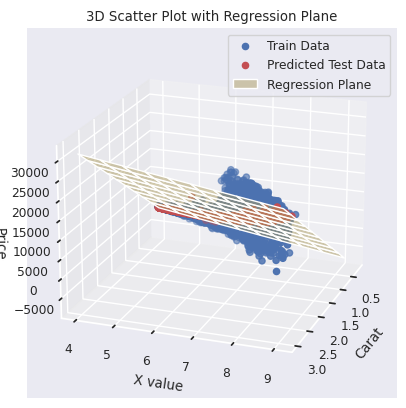

In [216]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_train_values = x_train['carat']
y_train_values = x_train['x']
z_train_values = y_train['price']

x_test_values = x_test['carat']
y_test_values = x_test['x']

# Параметры для графика
ax.scatter(x_train_values, y_train_values, z_train_values, color='b', label='Train Data')
ax.scatter(x_test_values, y_test_values, y_pred_new, color='r', label='Predicted Test Data')

# Создание плоскости
# Зададим диапазоны для плоскости
x_range = np.linspace(x_train_values.min(), x_train_values.max(), 10)
y_range = np.linspace(y_train_values.min(), y_train_values.max(), 10)
x_plane, y_plane = np.meshgrid(x_range, y_range)

# Предсказание для плоскости
z_plane = model_new_fitted.predict(pd.DataFrame({'carat': x_plane.ravel(), 'x': y_plane.ravel()})).reshape(x_plane.shape)

# Рисуем плоскость
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.5, color='y', label='Regression Plane')

# Настройка меток и заголовка
ax.set_xlabel('Carat')
ax.set_ylabel('X value')
ax.set_zlabel('Price')
ax.set_title('3D Scatter Plot with Regression Plane')
ax.legend()
ax.view_init(elev=20, azim=20)

plt.show()


Рис. 9. График рассеяния зависимой величины price от определяющего признака sqft_living, grade, bathrooms

Для оценки точности построим гистограмму распределения ошибок:


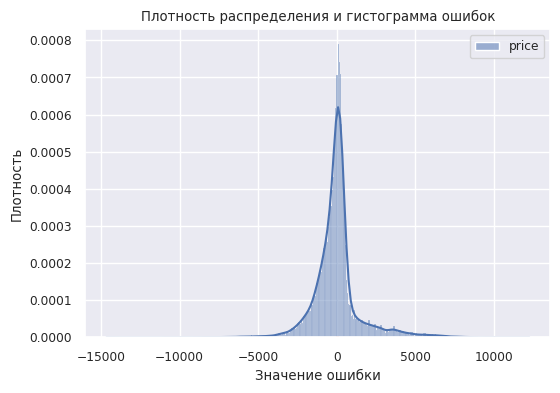

In [217]:
plt.figure(figsize=(6,4))

# Гистограмма и Плотность распределения - sns.distplot
# data = y_true - y_pred
sns.histplot( data = y_test[['price']] - y_pred_new,
              color="red",
              kde=True, # оценка плотности в виде кривой
              stat="density",# density: общая площадь равна 1
            )

# Осевая линия
plt.plot(
    [0, 0],
    [0, 25 * pow(10,-7)], '--', lw=2, c='r')

plt.ylabel(u'Плотность')
plt.xlabel(u'Значение ошибки')
plt.title(u'Плотность распределения и гистограмма ошибок');
plt.show()

Рис. 10. Гистограммa распределения ошибок

Text(0, 0.5, 'Абсолютная ошибка')

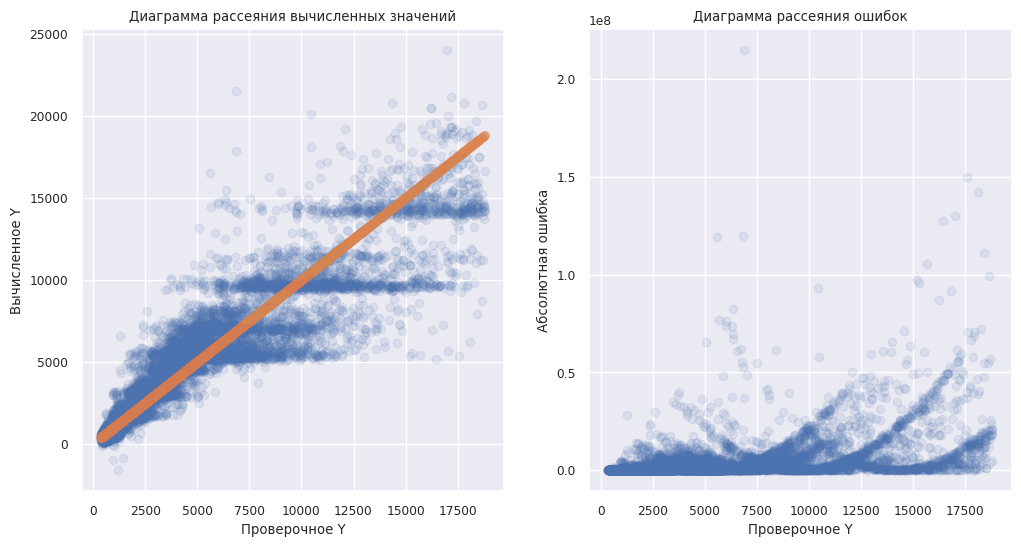

In [218]:
plt.figure(figsize=(12,6))

# создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс в сетке
plt.subplot(121)
plt.scatter(y_test[['price']], y_pred_new,  alpha=0.1)
plt.scatter(y_test[['price']], y_test[['price']],  alpha=0.1)
plt.title('Диаграмма рассеяния вычисленных значений');
plt.xlabel('Проверочное Y')
plt.ylabel('Вычисленное Y')

# создать первое полотно 121: 1-строк, 2-столбцов, 2-индекс в сетке
plt.subplot(122)
plt.scatter(y_test[['price']], (y_test[['price']] - y_pred_new)**2,  alpha=0.1)

plt.title('Диаграмма рассеяния ошибок')
plt.xlabel('Проверочное Y')
plt.ylabel('Абсолютная ошибка')

Рис.11. График рассеяния вычисленных значений Y_pred от проверочных значений Y_test;
Рис.12. График квадратов ошибок от проверочных значний Y_test.

С помощью функций __sklearn.metrics.*__ сравним реальные и вычисленные значениямя и получим важные оценки качества модели

In [219]:
print ("Линейная одномерная регрессия. Признаки 'carat', 'x'.")
print ("y_pred_new (x) = x * {} + {}\n".format(
              model_new_fitted.coef_,
              model_new_fitted.intercept_))

'''
Вычисление и вывод метрик: MAE, RMSE, R2.
На основе сравнения проверочных и вычисленных.
'''
mae  = metrics.mean_absolute_error(y_test, y_pred_new)
mse  = metrics.mean_squared_error (y_test, y_pred_new)
rmse = np.sqrt(mse)
r2   = metrics.r2_score           (y_test, y_pred_new)

print ("MAE : {:>9,.3f} (средняя абсолютная ошибка)".format              ( mae ))
print ("MSE : {:>9,.6f} (среднеквадратичная ошибка)".format( mse ))
print ("RMSE: {:>9,.6f} (кв. корень из среднеквадратичной ошибки)".format( rmse ))
print ("R2  : {:>9,.3f} (коэфф. детерминации)".format                    ( r2 ))

Линейная одномерная регрессия. Признаки 'carat', 'x'.
y_pred_new (x) = x * [[11215.0781795  -1454.93682783]] + [3329.37920705]

MAE :   902.063 (средняя абсолютная ошибка)
MSE : 2,265,109.941752 (среднеквадратичная ошибка)
RMSE: 1,505.028220 (кв. корень из среднеквадратичной ошибки)
R2  :     0.860 (коэфф. детерминации)


## Создадим многомерную модель, которая будет предсказывать цену по признаку x,y,z:

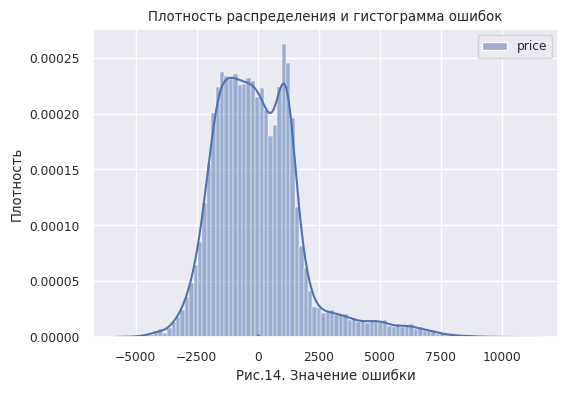

Линейная одномерная регрессия. Признак 'многа'.
y_pred_new2 (x) = x * [[-491.96376744 3494.83504431  341.10030635]] + [-14517.87288209]

MAE : 1,372.413 (средняя абсолютная ошибка)
MSE : 3,368,267.249762 (среднеквадратичная ошибка)
RMSE: 1,835.283970 (кв. корень из среднеквадратичной ошибки)
R2  :     0.792 (коэфф. детерминации)
K   : 37224 (количество наблюдений)
B   : [[-491.96376744 3494.83504431  341.10030635]] (коэффициент регрессии)


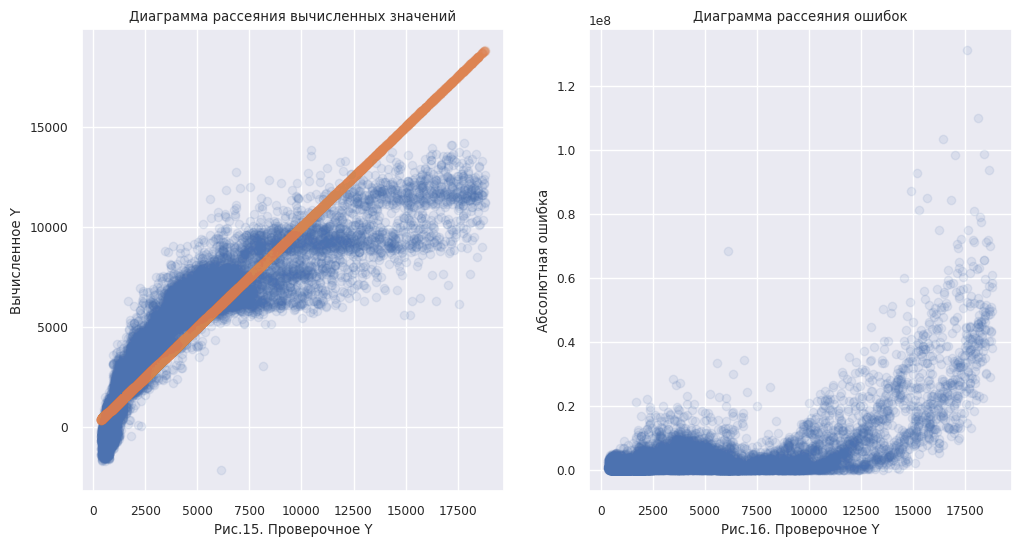

In [220]:
model_new2 = linear_model.LinearRegression()
model_new_fitted2 = model_new.fit(
    x_train[['x','y','z']],
    y_train[['price']]
)
y_pred_new2 = model_new_fitted2.predict(x_test[['x','y','z']])



# ==============================

plt.figure(figsize=(6,4))

# Гистограмма и Плотность распределения - sns.distplot
# data = y_true - y_pred
sns.histplot( data = y_test[['price']] - y_pred_new2,
              color="red",
              kde=True, # оценка плотности в виде кривой
              stat="density",# density: общая площадь равна 1
            )

# Осевая линия
plt.plot(
    [0, 0],
    [0, 25 * pow(10,-7)], '--', lw=2, c='r')

plt.ylabel(u'Плотность')
plt.xlabel(u'Рис.14. Значение ошибки')
plt.title(u'Плотность распределения и гистограмма ошибок');
plt.show()

# ==============================

plt.figure(figsize=(12,6))

# создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс в сетке
plt.subplot(121)
plt.scatter(y_test[['price']], y_pred_new2,  alpha=0.1)
plt.scatter(y_test[['price']], y_test[['price']],  alpha=0.1)
plt.title('Диаграмма рассеяния вычисленных значений')
plt.xlabel('Рис.15. Проверочное Y')
plt.ylabel('Вычисленное Y')

# создать первое полотно 121: 1-строк, 2-столбцов, 2-индекс в сетке
plt.subplot(122)
plt.scatter(y_test[['price']], (y_test[['price']] - y_pred_new2)**2,  alpha=0.1)

plt.title('Диаграмма рассеяния ошибок')
plt.xlabel('Рис.16. Проверочное Y')
plt.ylabel('Абсолютная ошибка')

# ==============================

print ("Линейная одномерная регрессия. Признак 'многа'.")
print ("y_pred_new2 (x) = x * {} + {}\n".format(
              model_new_fitted2.coef_,
              model_new_fitted2.intercept_))

'''
Вычисление и вывод метрик: MAE, RMSE, R2.
На основе сравнения проверочных и вычисленных.
'''
mae  = metrics.mean_absolute_error(y_test, y_pred_new2)
mse  = metrics.mean_squared_error (y_test, y_pred_new2)
rmse = np.sqrt(mse)
r2   = metrics.r2_score           (y_test, y_pred_new2)

print ("MAE : {:>9,.3f} (средняя абсолютная ошибка)".format              ( mae ))
print ("MSE : {:>9,.6f} (среднеквадратичная ошибка)".format( mse ))
print ("RMSE: {:>9,.6f} (кв. корень из среднеквадратичной ошибки)".format( rmse ))
print ("R2  : {:>9,.3f} (коэфф. детерминации)".format                    ( r2 ))
print ("K   : {} (количество наблюдений)" .format(x_train.shape[0]))
print ("B   : {} (коэффициент регрессии)" .format(model_new_fitted2.coef_))


# ИТОГИ

In [221]:
import pandas as pd

ddf = pd.DataFrame (
    {
        "Признак": ["carat", 'carat, x','x,y,z'],
        "K":       [7839,     [11215.0781795  -1454.93682783],     [-491.96376744 3494.83504431  341.10030635]],
        "B":       [-2326,     3329.37,     -14517.87],
        "MAE":     [1020.129,     902,     1372.413],
        "RMSE":    [1540.181,     1505.02,     1835.2839],
        "R2":      [0.854,      0.860,     0.792],
    }
 )
ddf


SyntaxError: invalid syntax. Perhaps you forgot a comma? (477288317.py, line 6)

По коэффициенту детерминации лидирует вторая модель, связанно это с тем, что в ней использовались признаки имеющие наиболее высокий коэфф. корреляции - жилая площадь, оценка квартиры и кол-во ванных комнат. В сравнении с одномерной моделяью многомерные показывают более высокую предсказательную способность.

In [180]:
print(x_train)

       carat     x     y     z
43071   0.62  5.46  5.50  3.39
24872   1.64  7.60  7.58  4.69
7465    0.90  6.22  6.19  3.85
28666   0.29  4.32  4.36  2.62
40627   0.41  4.78  4.76  2.92
...      ...   ...   ...   ...
10482   1.25  7.07  7.02  4.23
35363   0.38  4.69  4.66  2.83
18583   1.52  7.38  7.41  4.56
26166   1.21  6.75  6.84  4.27
4596    0.70  5.74  5.77  3.50

[37224 rows x 4 columns]
